In [227]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import seaborn as sns

In [228]:
# dataset = make_blobs(n_samples=9,
#                     centers=4,
#                     n_features=4,
#                     cluster_std=1.6,
#                     random_state=50)

In [274]:
# points =dataset[0]
df= pd.read_csv('Manipur.csv');
# data= df.iloc[:,3:-2]
# df=df.iloc[9:18]
single_dist = df.DISTRICT == "BISHNUPUR"
# df=df[single_dist]
df

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,MANIPUR,BISHNUPUR,2001,29,25,1,1,0,1,3,...,7,21,0,0,0,1,0,0,98,226
1,MANIPUR,CHANDEL,2001,7,7,0,0,0,0,1,...,1,13,0,0,0,0,0,0,20,74
2,MANIPUR,CHURACHANDPUR,2001,35,21,0,1,0,1,0,...,3,3,0,0,0,0,0,0,47,132
3,MANIPUR,IMPHAL(EAST),2001,29,29,2,7,0,7,13,...,8,26,0,2,0,1,0,0,128,337
4,MANIPUR,IMPHAL(WEST),2001,44,42,2,7,0,7,48,...,27,75,0,17,0,3,0,1,521,1084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,MANIPUR,IMPHAL WEST,2012,14,149,3,18,0,18,72,...,14,122,0,21,0,9,0,1,408,1485
104,MANIPUR,SENAPATI,2012,2,19,0,2,0,2,22,...,7,4,0,1,0,0,0,0,51,176
105,MANIPUR,TAMENGLONG,2012,11,5,0,1,0,1,7,...,3,3,0,0,0,0,0,0,18,73
106,MANIPUR,THOUBAL,2012,16,73,0,20,0,20,44,...,22,80,0,12,1,17,0,0,225,691


In [304]:
# data_arr= data.to_numpy()
# data = df[['MURDER','RAPE','THEFT','BURGLARY','ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY']]
data = df[['DISTRICT','MURDER']]
data["TOTAL"]= data.sum(axis=1)
data

C:\Users\ranjay kumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,DISTRICT,MURDER,TOTAL
0,BISHNUPUR,29,29
1,CHANDEL,7,7
2,CHURACHANDPUR,35,35
3,IMPHAL(EAST),29,29
4,IMPHAL(WEST),44,44
...,...,...,...
103,IMPHAL WEST,14,14
104,SENAPATI,2,2
105,TAMENGLONG,11,11
106,THOUBAL,16,16


In [276]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)

In [308]:
# plt.scatter(data_arr[:,0],data_arr[:,1])
data_arr = data.iloc[:,1:-1]
data_arr = np.array(data_arr)
data_arr


array([[29],
       [ 7],
       [35],
       [29],
       [44],
       [27],
       [ 2],
       [32],
       [ 4],
       [24],
       [ 9],
       [30],
       [24],
       [32],
       [13],
       [ 3],
       [27],
       [ 3],
       [22],
       [17],
       [14],
       [25],
       [28],
       [17],
       [ 3],
       [22],
       [ 2],
       [19],
       [ 6],
       [26],
       [24],
       [28],
       [ 7],
       [ 1],
       [38],
       [10],
       [30],
       [20],
       [49],
       [38],
       [49],
       [10],
       [ 7],
       [46],
       [ 7],
       [14],
       [14],
       [43],
       [31],
       [41],
       [13],
       [ 9],
       [36],
       [ 4],
       [31],
       [16],
       [28],
       [41],
       [61],
       [17],
       [ 3],
       [39],
       [ 4],
       [16],
       [13],
       [18],
       [30],
       [42],
       [14],
       [ 3],
       [46],
       [ 5],
       [16],
       [ 6],
       [15],
       [29],
       [32],

In [309]:
clusters = KMeans(4)  # 4 clusters!

clusters.fit( data_arr )
clusters.cluster_centers_
clusters.labels_


data['Crime_clusters'] = clusters.labels_
df['Crime_clusters'] = clusters.labels_
data.sort_values(by=['TOTAL'],ascending = True)



C:\Users\ranjay kumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,DISTRICT,MURDER,TOTAL,Crime_clusters
87,TAMENGLONG,0,0,2
33,TAMENGLONG,1,1,2
104,SENAPATI,2,2,2
91,CHANDEL,2,2,2
6,TAMENGLONG,2,2,2
...,...,...,...,...
43,THOUBAL,46,46,1
70,THOUBAL,46,46,1
38,CHURACHANDPUR,49,49,1
40,IMPHAL(WEST),49,49,1


In [316]:
# plt.scatter(points[y_label== 0,0],points[y_label== 0,1],s=50,color='red')
# plt.scatter(points[y_label== 1,0],points[y_label== 1,1],s=50,color='blue')
# plt.scatter(points[y_label== 2,0],points[y_label== 2,1],s=50,color='green')
# plt.scatter(points[y_label== 3,0],points[y_label== 3,1],s=50,color='yellow')
centers = np.array(clusters.cluster_centers_)
center_sum =np.sum(centers,axis=1)
centers
dum_arr= np.array([0,1,2,3])
center_sum

v_high = df.Crime_clusters == 1
df[v_high]

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,Crime_clusters
4,MANIPUR,IMPHAL(WEST),2001,44,42,2,7,0,7,48,...,75,0,17,0,3,0,1,521,1084,1
34,MANIPUR,THOUBAL,2004,38,46,0,11,0,11,32,...,43,0,2,0,1,0,1,125,346,1
38,MANIPUR,CHURACHANDPUR,2005,49,25,1,0,0,0,4,...,4,0,2,0,0,0,0,66,175,1
39,MANIPUR,IMPHAL(EAST),2005,38,50,0,4,0,4,28,...,62,0,3,0,1,0,0,221,523,1
40,MANIPUR,IMPHAL(WEST),2005,49,68,1,10,0,10,41,...,107,0,12,0,3,0,3,448,1058,1
43,MANIPUR,THOUBAL,2005,46,38,1,7,0,7,20,...,73,0,3,0,15,0,1,207,482,1
47,MANIPUR,CHURACHANDPUR,2006,43,30,1,20,0,20,1,...,8,0,5,0,0,0,1,114,264,1
49,MANIPUR,IMPHAL WEST,2006,41,74,0,9,0,9,51,...,106,0,15,0,5,0,0,428,1058,1
57,MANIPUR,IMPHAL EAST,2007,41,89,0,1,0,1,28,...,68,0,4,0,1,0,0,182,608,1
58,MANIPUR,IMPHAL WEST,2007,61,130,0,7,0,7,64,...,138,0,28,0,11,0,0,408,1238,1


In [311]:

# plt.scatter(data.iloc[:,-2],data.iloc[:,-1]);
# plt.scatter(center_sum[:], dum_arr[:], marker="x", color='r')


In [312]:
cluster_index = []
# color_dict= dict(Very_High="red", High="brown",Low="orange",Very_Low="yellow")
cluster_intens=['red','brown','orange','yellow']
cluster_color=['red','brown','orange','yellow']
for i in range(0,4):
    index= np.argmax(center_sum)
    print(index)
    center_sum[index]=0;
    
#     np.insert(cluster_index,0,index)
    cluster_index.append(index)
    cluster_color[index]=cluster_intens[i]

print(cluster_color)
print(cluster_index)



1
3
0
2
['orange', 'red', 'yellow', 'brown']
[1, 3, 0, 2]


C:\Users\ranjay kumar\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


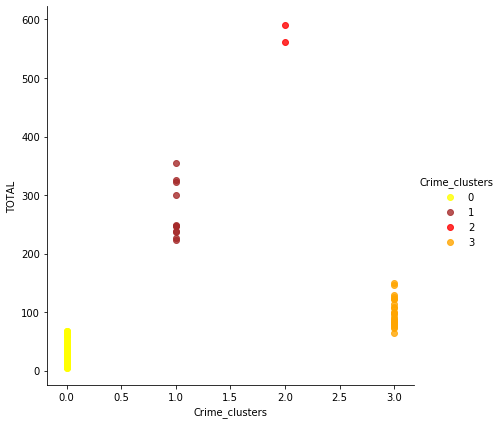

In [290]:
# center_sum
sns.lmplot( 'Crime_clusters','TOTAL',  data=data,
        hue = 'Crime_clusters',palette=(cluster_color[0],cluster_color[1],cluster_color[2], cluster_color[3]),
        fit_reg=False, size = 6 );
